In [1]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
%matplotlib inline

In [2]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

In [3]:


df = lib_copy.fetch_ohlcv("TSLA", "2018-01-12", "2019-06-12")

In [4]:
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

In [5]:
everything = adding_boll_kelt_ewma_dataframe(df)

In [6]:
# Looking for missing values
everything.isnull().sum().sum()

61

In [7]:
# Filling missing values with the previous ones
everything = df.dropna()
everything

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,tr,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21
2018-01-16 12:30:00-05:00,342.3410,342.3410,341.4100,341.4100,4236,339.28145,3.153307,345.588064,332.974836,342.1200,0.9310,1.694076,1.694076,339.28145,340.975526,337.587374,341.297157,339.800440
2018-01-16 12:45:00-05:00,341.1200,341.4600,340.6100,340.8400,6321,339.53345,3.060461,345.654373,333.412527,341.4100,0.8500,1.616065,1.616065,339.53345,341.149515,337.917385,341.205726,339.894945
2018-01-16 13:00:00-05:00,340.7200,341.1100,339.3100,340.7900,14818,339.86145,2.802844,345.467137,334.255763,340.8400,1.8000,1.632715,1.632715,339.86145,341.494165,338.228735,341.122581,339.976314
2018-01-16 13:15:00-05:00,340.8900,341.0000,338.7300,339.8600,12676,340.09745,2.573720,345.244891,334.950009,340.7900,2.2700,1.689322,1.689322,340.09745,341.786772,338.408128,340.870064,339.965740
2018-01-16 13:30:00-05:00,340.2610,340.3450,339.8700,340.1400,12532,340.34255,2.306088,344.954725,335.730375,339.8600,0.4850,1.584177,1.584177,340.34255,341.926727,338.758373,340.724052,339.981582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-11 15:30:00-04:00,217.0500,217.3800,216.7750,216.8600,17531,215.68855,1.058931,217.806413,213.570687,216.8000,0.6050,1.130489,1.130489,215.68855,216.819039,214.558061,216.316038,215.883152
2019-06-11 15:45:00-04:00,216.9200,217.6550,216.7800,217.0500,29977,215.69055,1.061593,217.813736,213.567364,216.8600,0.8750,1.112240,1.112240,215.69055,216.802790,214.578310,216.462830,215.989229
2019-06-11 16:00:00-04:00,217.0506,217.0506,217.0506,217.0506,6000,215.70553,1.079310,217.864151,213.546909,217.0500,0.0006,1.032837,1.032837,215.70553,216.738367,214.672693,216.580384,216.085717
2019-06-11 17:45:00-04:00,221.3100,221.3100,221.3100,221.3100,500,215.94453,1.649900,219.244330,212.644730,217.0506,4.2594,1.263306,1.263306,215.94453,217.207836,214.681224,217.526307,216.560652


In [8]:
response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data
final_df

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,...,kcmid,kcup,kclo,EMA9,EMA21,squeeze,crossup,crossdown,target,io_target
2018-01-16,342.3410,342.3410,341.4100,341.4100,4236,339.28145,3.153307,345.588064,332.974836,342.1200,...,339.28145,340.975526,337.587374,341.297157,339.800440,0.0,0.0,0.0,0.0,0.0
2018-01-16,341.1200,341.4600,340.6100,340.8400,6321,339.53345,3.060461,345.654373,333.412527,341.4100,...,339.53345,341.149515,337.917385,341.205726,339.894945,0.0,0.0,0.0,0.0,0.0
2018-01-16,340.7200,341.1100,339.3100,340.7900,14818,339.86145,2.802844,345.467137,334.255763,340.8400,...,339.86145,341.494165,338.228735,341.122581,339.976314,0.0,0.0,0.0,0.0,0.0
2018-01-16,340.8900,341.0000,338.7300,339.8600,12676,340.09745,2.573720,345.244891,334.950009,340.7900,...,340.09745,341.786772,338.408128,340.870064,339.965740,0.0,0.0,0.0,0.0,0.0
2018-01-16,340.2610,340.3450,339.8700,340.1400,12532,340.34255,2.306088,344.954725,335.730375,339.8600,...,340.34255,341.926727,338.758373,340.724052,339.981582,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-11,217.0500,217.3800,216.7750,216.8600,17531,215.68855,1.058931,217.806413,213.570687,216.8000,...,215.68855,216.819039,214.558061,216.316038,215.883152,0.0,0.0,0.0,0.0,0.0
2019-06-11,216.9200,217.6550,216.7800,217.0500,29977,215.69055,1.061593,217.813736,213.567364,216.8600,...,215.69055,216.802790,214.578310,216.462830,215.989229,0.0,0.0,0.0,0.0,0.0
2019-06-11,217.0506,217.0506,217.0506,217.0506,6000,215.70553,1.079310,217.864151,213.546909,217.0500,...,215.70553,216.738367,214.672693,216.580384,216.085717,0.0,0.0,0.0,0.0,0.0
2019-06-11,221.3100,221.3100,221.3100,221.3100,500,215.94453,1.649900,219.244330,212.644730,217.0506,...,215.94453,217.207836,214.681224,217.526307,216.560652,0.0,0.0,0.0,0.0,0.0


In [9]:
"""practice logic

merge actual cross and actual squeeze DF's
carolina's_df = pd.Concatenate(ewma_cross, squeeze)

feed merged df into jonathans target function using 1+1 = 2 target mechanism

use lstm model: utilizing the squeeze and the ewma cross as features and the target as the target

spit out graph

"""


"practice logic\n\nmerge actual cross and actual squeeze DF's\ncarolina's_df = pd.Concatenate(ewma_cross, squeeze)\n\nfeed merged df into jonathans target function using 1+1 = 2 target mechanism\n\nuse lstm model: utilizing the squeeze and the ewma cross as features and the target as the target\n\nspit out graph\n\n"

In [10]:
X = final_df.iloc[:, 0:20].values
y = final_df.iloc[:, :1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [11]:
print (f"X sample values:\n{X[:3]} \n")
print (f"X sample values:\n{y[:3]} \n")


X sample values:
[[3.42341000e+02 3.42341000e+02 3.41410000e+02 3.41410000e+02
  4.23600000e+03 3.39281450e+02 3.15330689e+00 3.45588064e+02
  3.32974836e+02 3.42120000e+02 9.31000000e-01 1.69407581e+00
  1.69407581e+00 3.39281450e+02 3.40975526e+02 3.37587374e+02
  3.41297157e+02 3.39800440e+02 0.00000000e+00 0.00000000e+00]
 [3.41120000e+02 3.41460000e+02 3.40610000e+02 3.40840000e+02
  6.32100000e+03 3.39533450e+02 3.06046133e+00 3.45654373e+02
  3.33412527e+02 3.41410000e+02 8.50000000e-01 1.61606473e+00
  1.61606473e+00 3.39533450e+02 3.41149515e+02 3.37917385e+02
  3.41205726e+02 3.39894945e+02 0.00000000e+00 0.00000000e+00]
 [3.40720000e+02 3.41110000e+02 3.39310000e+02 3.40790000e+02
  1.48180000e+04 3.39861450e+02 2.80284351e+00 3.45467137e+02
  3.34255763e+02 3.40840000e+02 1.80000000e+00 1.63271483e+00
  1.63271483e+00 3.39861450e+02 3.41494165e+02 3.38228735e+02
  3.41122581e+02 3.39976314e+02 0.00000000e+00 0.00000000e+00]] 

X sample values:
[[342.341]
 [341.12 ]
 [340.72

In [12]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [13]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [14]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.81013287]
  [0.78529229]
  [0.80605226]
  [0.80569023]
  [0.00484291]
  [0.81487029]
  [0.12559915]
  [0.77399023]
  [0.80549373]
  [0.80917785]
  [0.01884615]
  [0.18734026]
  [0.18734026]
  [0.81487029]
  [0.80454596]
  [0.82132416]
  [0.82385497]
  [0.82300076]
  [0.        ]
  [0.        ]]

 [[0.80413101]
  [0.78108121]
  [0.80212986]
  [0.80289031]
  [0.00728427]
  [0.81615463]
  [0.12136673]
  [0.77430372]
  [0.80772573]
  [0.80569023]
  [0.01720648]
  [0.17269584]
  [0.17269584]
  [0.81615463]
  [0.80541878]
  [0.82302385]
  [0.82339203]
  [0.823487  ]
  [0.        ]
  [0.        ]]

 [[0.8021648 ]
  [0.77940825]
  [0.79575597]
  [0.8026447 ]
  [0.01723355]
  [0.81782631]
  [0.10962305]
  [0.77341852]
  [0.81202581]
  [0.80289031]
  [0.03643725]
  [0.17582144]
  [0.17582144]
  [0.81782631]
  [0.80714772]
  [0.82462743]
  [0.82297105]
  [0.82390565]
  [0.        ]
  [0.        ]]] 

X_test sample values:
[[[0.81646898]
  [0.79331772]
  [0.81296548]
  

In [15]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [16]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [17]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [18]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 20, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [19]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
79/79 [==============================] - 2s 27ms/step - loss: 0.0862
Epoch 2/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0201
Epoch 3/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0186
Epoch 4/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0169
Epoch 5/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0148
Epoch 6/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0126
Epoch 7/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0115
Epoch 8/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0104
Epoch 9/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0092
Epoch 10/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0084


In [20]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0008662681793794036

In [21]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [22]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [23]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = final_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

,Actual,Predicted
2019-01-15,343.630,332.127411
2019-01-15,343.420,332.073334
2019-01-15,341.585,331.471863
2019-01-15,342.250,331.717072
2019-01-15,343.430,331.494263


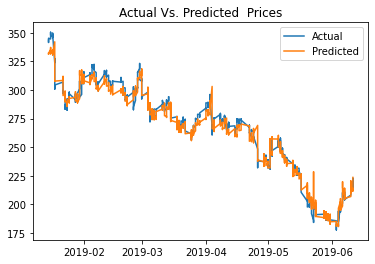

In [24]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted  Prices")

In [25]:
price = pd.DataFrame(stocks)
price

,Actual,Predicted
2019-01-15,343.6300,332.127411
2019-01-15,343.4200,332.073334
2019-01-15,341.5850,331.471863
2019-01-15,342.2500,331.717072
2019-01-15,343.4300,331.494263
...,...,...
2019-06-11,217.0500,212.629593
2019-06-11,216.9200,212.884659
2019-06-11,217.0506,211.587036
2019-06-11,221.3100,216.495819


In [26]:
fast_ema = 9
slow_ema = 21

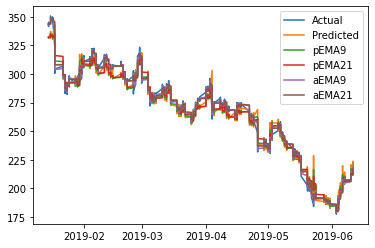

In [27]:
# create EMAs columns
price['pEMA9'] = price['Predicted'].ewm(span=fast_ema, adjust=False).mean()
price['pEMA21'] = price['Predicted'].ewm(span=slow_ema, adjust=False).mean()
price['aEMA9'] = price['Actual'].ewm(span=fast_ema, adjust=False).mean()
price['aEMA21'] = price['Actual'].ewm(span=slow_ema, adjust=False).mean()
# price['compEMAS'] = 0.0
price.plot()

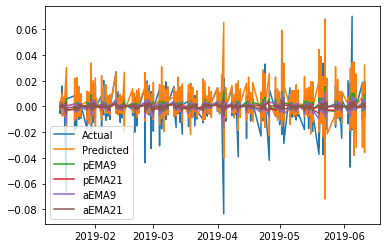

In [29]:
price.pct_change().plot()

using squeeze and emax signal

In [33]:
beautiful_csv = pd.read_csv("Resources/ts_emax_x_squeeze.csv", parse_dates=[['Date', 'Time']])
beautiful_csv.set_index("Date_Time", inplace=True)
df = beautiful_csv[["squeeze", "emax_signal"]]
df.head()

,squeeze,emax_signal
Date_Time,,
2018-01-12 08:45:00,0,0
2018-01-12 09:00:00,0,0
2018-01-12 09:15:00,0,0
2018-01-12 09:30:00,0,0
2018-01-12 09:45:00,0,0


In [34]:
def target_generator(dataframe_name, col_name1, col_name2, target_col_name):
    """Creates a target for long position
    Args:
        dataframe_name (dict): Dataframe containing indicator data (0's and 1's)
        col_name1 (str): Name of first column name in dataframe to use for calculation
        col_name2 (str): Name of second column name in dataframe to use for calculation
        target_col_name (str): Name of target column name to create and store target values
    Returns:
        A dataframe of:
            original data passed to function,
            appended target column signals of type float (2.0, 1.0, 0.0)
    """
    
    # Target generation
    for index, row in dataframe_name.iterrows():
        dataframe_name.loc[index, target_col_name] = row[col_name1] + row[col_name2]

    # Return dataframe with features and target
    return dataframe_name

In [35]:
new_df = target_generator(df, "squeeze", "emax_signal", "target")
new_df.head()

,squeeze,emax_signal,target
Date_Time,,,
2018-01-12 08:45:00,0,0,0.0
2018-01-12 09:00:00,0,0,0.0
2018-01-12 09:15:00,0,0,0.0
2018-01-12 09:30:00,0,0,0.0
2018-01-12 09:45:00,0,0,0.0


In [36]:
new_df.to_csv("Resources/LSTM_target_list1.csv")

In [40]:
lib_copy.lstm1(new_df)

Epoch 1/10
73/73 [==============================] - 0s 6ms/step - loss: 2.4885
Epoch 2/10
73/73 [==============================] - 1s 7ms/step - loss: 2.1902
Epoch 3/10
73/73 [==============================] - 0s 6ms/step - loss: 2.0639
Epoch 4/10
73/73 [==============================] - 0s 6ms/step - loss: 1.9757
Epoch 5/10
73/73 [==============================] - 0s 6ms/step - loss: 1.9076
Epoch 6/10
73/73 [==============================] - 0s 6ms/step - loss: 1.8514
Epoch 7/10
73/73 [==============================] - 0s 6ms/step - loss: 1.8021
Epoch 8/10
73/73 [==============================] - 0s 6ms/step - loss: 1.7582
Epoch 9/10
73/73 [==============================] - 0s 5ms/step - loss: 1.7205
Epoch 10/10
73/73 [==============================] - 0s 6ms/step - loss: 1.6851
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 30)             

AttributeError: 'DataFrame' object has no attribute 'scatter'

[[0.  0.5]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 30)             3960      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 30)             7320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 30)             7320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1) 

(None,
 0.01080905832350254,
 <matplotlib.axes._subplots.AxesSubplot at 0x14af26b20>)

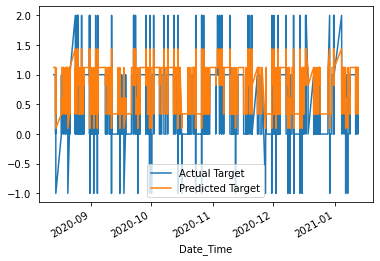

In [38]:
lstm1(new_df, epochs_num= 1, num_feature_cols=2)